# Radon Transform Python Example

This example will tie together all of the skills you have learned over the duration of this course. Your final task is to implement some code that will simulate the process of medical image acquistion and reconstruction. The first step is to develop a Radon Transform which will simulate the process of acquring medical imaging data using paralell beams in a CT scanner. The formula you will be implementing is given below: 

$$ P(s, \theta) = \int\limits_{-\infty}^\infty\ \int\limits_{-\infty}^\infty\ f(x,y) \delta(x\cos\theta - s + y\sin\theta) \mathrm{d}x \mathrm{d}y $$

Several Python Libraries and Modules are required
1. os.path is required to run check as to whether a certain file exists within current working directory
2. math is required for computing the angle in radians of a particular projection view
3. numpy is needed for the column-wise summation and vertical stacking of projection views
4. scipy.interpolate and scipy.interpolation are required to perform the image rotation and subsequent interpolation
5. scipy.misc is required for the image reading and writing utilities
6. For demonstration purposes the modules pyplot and cm (colour map) have been imported from matplotlib so that images can be displayed on the screen. 

It's also worth nothing that any plots used will be inserted inline into this Python notebook. 

In [12]:
%matplotlib inline

import os.path
import math
import numpy as np

import scipy.interpolate
import scipy.misc
import scipy.ndimage.interpolation
import matplotlib.pyplot as plt
import matplotlib.cm as cm

testInput is a function which will inspect the user input and ensure that the user is adhering to the guidelines of correct operation and isn't abusing the interface. 

In [13]:
def testInput(N, filename):
    assert type(N) is int, "N is not an integer: %r" % N  
    assert os.path.isfile(filename), "%r does not exist" % filename 

angle is a simple helper function to return a rotation angle in radians for a particular projection view.

In [14]:
def angle(i): 
    return (math.pi*i)/N

Ask for the input from the user using input (for numeric values) and raw_input (for a string) and then test the input with the function above. 

In [15]:
N = input("Please Enter the number of projections: ")
filename = raw_input("Please Enter Phantom File Name: ")

testInput(N, filename);

Please Enter the number of projections: 180
Please Enter Phantom File Name: Phantom.jpg


If the tests were succesful then open the file and initialise the sinogram as a single row of zeroes. Show the Shepp-Logan phantom using a Matlab style plot. 

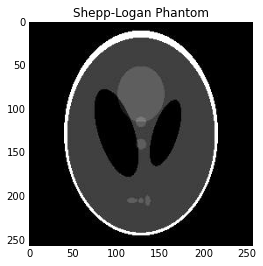

In [16]:
phantom = scipy.misc.imread(filename)

plt.imshow(phantom, cmap=cm.Greys_r)
plt.title('Shepp-Logan Phantom')
plt.show()

sinogram = np.zeros(256);

Perform the first projection operation by summing the columns of the original phantom withot rotation

In [17]:
projectionView = np.sum(phantom, axis=0);

for i in xrange(256):
    sinogram[i] = projectionView[i];

From the second projection view onwards, rotate by the angle returned by angle() for each proection view and use spline interpolation for the new pixel coordinates. Do not use any zero padding as the image doesn't occupy the full field of view and any values that "rotate into view" will be defaulted to zero.

After column-wise summation, stack each projection view vertically to build up the Sinogram

In [18]:
for i in xrange(1, N):
    rotationAngle = angle(i);
    rotatedPhantom = scipy.ndimage.interpolation.rotate(phantom, 
                                                        np.rad2deg(rotationAngle), 
                                                        order = 3, 
                                                        reshape = False, 
                                                        mode = 'constant', 
                                                        cval = 0.0);
    projectionView = np.sum(rotatedPhantom, axis=0);
    sinogram = np.vstack((sinogram, projectionView));

Save the Sinogram with a filename chosen by the User; note we arent' testing this here as the file will be created in the current working directory and doesn't need to exist beforehand. Display the Sinogram using a plot. 

Please enter an Output File name: Sinogram.jpg


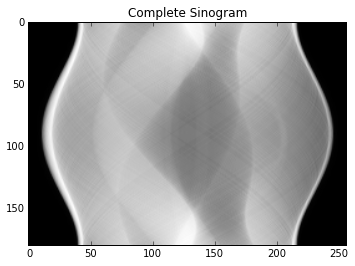

In [19]:

output = raw_input("Please enter an Output File name: ");
scipy.misc.imsave(output, sinogram)

plt.imshow(sinogram, cmap=cm.Greys_r)
plt.title('Complete Sinogram')
plt.show()